# F21DL: Decision Trees

### Preparation

In [33]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
np.random.seed(42)

In [2]:
# Training data
with np.load("./kmnist/k49-train-imgs.npz") as xTrain:
    xTrain = xTrain['arr_0']

# Training labels
with np.load("./kmnist/k49-train-labels.npz") as yTrain:
    yTrain = yTrain["arr_0"]

# Testing data 
with np.load("./kmnist/k49-test-imgs.npz") as xTest:
    xTest = xTest["arr_0"]

#Testing labels
with np.load("./kmnist/k49-test-labels.npz") as yTest:
    yTest = yTest["arr_0"]

In [3]:
# Flatten the 28*28 matrix so that each image is represented in one row.
xTrain = xTrain.reshape(-1, 28*28)
xTest = xTest.reshape(-1, 28*28)

In [4]:
# Choosing same arguments as the one in the tutorial notebook
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

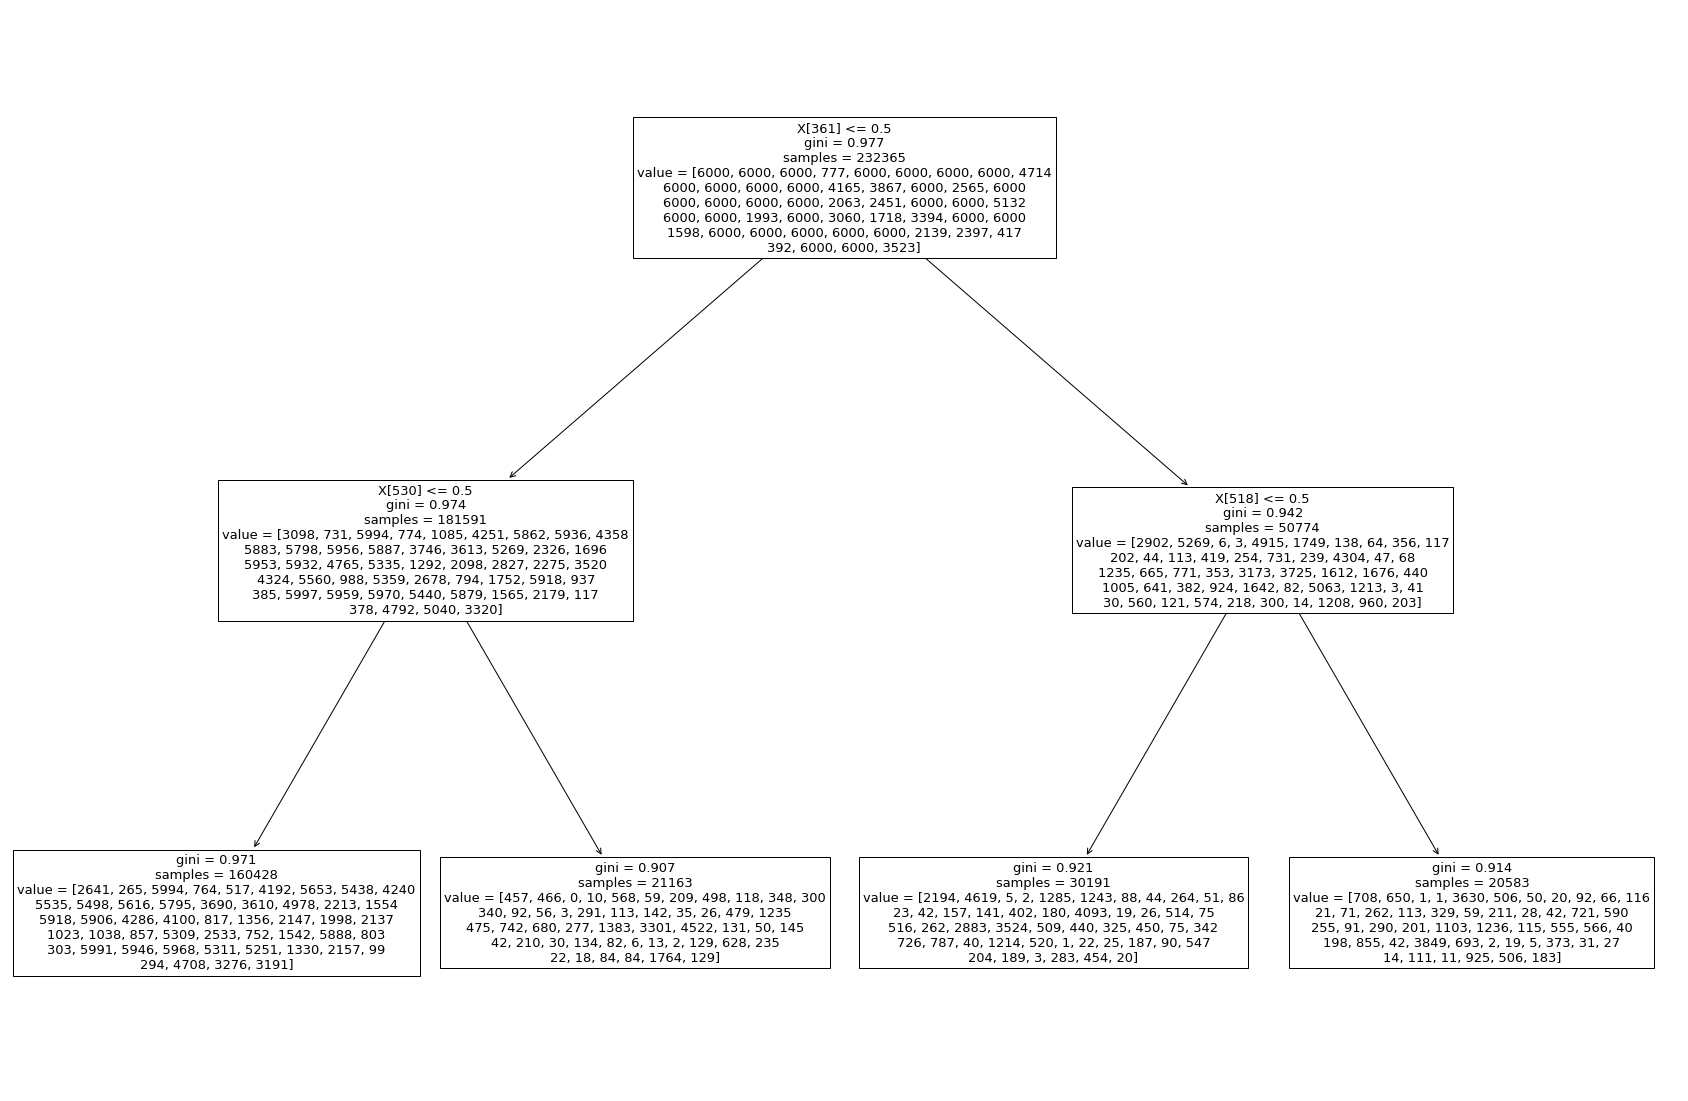

In [5]:
plt.figure(figsize=(30,20))
plot_tree(tree_clf, fontsize=13);

## Using only Training Data

In [6]:
yPred = tree_clf.predict(xTrain)

In [7]:
accuracy = accuracy_score(yTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 8.17%


In [8]:
confusion_matrix(yTrain, yPred)

array([[   0, 2194, 2641, ...,    0,    0,    0],
       [   0, 4619,  265, ...,    0,    0,    0],
       [   0,    5, 5994, ...,    0,    0,    0],
       ...,
       [   0,  283, 4708, ...,    0,    0,    0],
       [   0,  454, 3276, ...,    0,    0,    0],
       [   0,   20, 3191, ...,    0,    0,    0]])

In [9]:
classification_report(yTrain, yPred)

/Users/shariq/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shariq/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shariq/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      6000\n           1       0.15      0.77      0.26      6000\n           2       0.04      1.00      0.07      6000\n           3       0.00      0.00      0.00       777\n           4       0.00      0.00      0.00      6000\n           5       0.00      0.00      0.00      6000\n           6       0.00      0.00      0.00      6000\n           7       0.00      0.00      0.00      6000\n           8       0.00      0.00      0.00      4714\n           9       0.00      0.00      0.00      6000\n          10       0.00      0.00      0.00      6000\n          11       0.00      0.00      0.00      6000\n          12       0.00      0.00      0.00      6000\n          13       0.00      0.00      0.00      4165\n          14       0.00      0.00      0.00      3867\n          15       0.00      0.00      0.00      6000\n          16       0.00      0.00      0.00      2565\n       

### Observation
1. Accuracy in the training set is incredibly low at just **8.17%**.
2. **As expected, the confusion matrix is too large for me to interpret every class's value, so no TP and FP rate.**
3. For the classification report, some classes are not predicted at all which raises that error above.
4. This is likely because it is still an imbalanced image dataset and I have not been able to address it.
5. **ROC Curve not possible for multi-class data like this. I could reduce them to just two dimensions for the plot, but each dimension is just a pixle value so no good way of choosing features.**
6. **The classification report is very badly formatted and I cannot seem to fix it. Cannot list or interpret the precision, recall, F measures.**

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [12]:
scores = cross_val_score(tree_clf, xTest, yTest, scoring='accuracy', cv=cv, n_jobs=-1)

In [13]:
accuracy = np.mean(scores) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 7.33%


### Observation
1. With 10-Fold Cross validation, the accuracy actually **decreases** by 0.84 to **7.33%.**

## Using Training and Test Data

In [14]:
yPred = tree_clf.predict(xTest)

In [15]:
accuracy = accuracy_score(yTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 6.99%


In [16]:
confusion_matrix(yTest, yPred)

array([[   0,  279,  481, ...,    0,    0,    0],
       [   0,  698,   75, ...,    0,    0,    0],
       [   0,    0, 1000, ...,    0,    0,    0],
       ...,
       [   0,   45,  768, ...,    0,    0,    0],
       [   0,   68,  534, ...,    0,    0,    0],
       [   0,    2,  514, ...,    0,    0,    0]])

In [17]:
classification_report(yTest, yPred)

/Users/shariq/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shariq/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shariq/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1000\n           1       0.17      0.70      0.27      1000\n           2       0.04      1.00      0.07      1000\n           3       0.00      0.00      0.00       126\n           4       0.00      0.00      0.00      1000\n           5       0.00      0.00      0.00      1000\n           6       0.00      0.00      0.00      1000\n           7       0.00      0.00      0.00      1000\n           8       0.00      0.00      0.00       767\n           9       0.00      0.00      0.00      1000\n          10       0.00      0.00      0.00      1000\n          11       0.00      0.00      0.00      1000\n          12       0.00      0.00      0.00      1000\n          13       0.00      0.00      0.00       678\n          14       0.00      0.00      0.00       629\n          15       0.00      0.00      0.00      1000\n          16       0.00      0.00      0.00       418\n       

### Observation
1. **Just like before, the confusion matrix is too big to interpret for each class, so no TP and FP rates.**
2. **Classification report is being printed very badly again, so difficult to interpret precision, recall, F measures.**
3. **ROC Curve not possible again.**
4. Once again, some classes are not predicted which raises that error.
5. Accuracy **decreases** by 1.18 to **6.99%.**

**Important** <br>
6.  To answer the CW specification question from bullet point 3, it appears that the tree **DOES NOT** generalize well to new data, as evident by the lower accuracy.

## Experimenting with Tree Parameters

### Rationale

A decisiom tree can continue to grow until each region contains exactly one training point, **thereby achieving 100% accuracy**. However, that has significant computing costs for even a relatively small dataset such as the Kuzushiji-MNIST. For instance, my computer is very slow so I tried creating a full tree in Google Collab (free tier, but still faster than mine). After almost 30 minutes of execution returned nothing, I had to give up on it.
<br> <br>
**The other major issue with such a fully formed tree is overfitting.**
An over-fitted tree would achieve a perfect classification of the training observation and its bias (error) would be 0. However, this tree would be extremely sensitive because any little change to the input/training data would cause large changes in the predicted classes. **So this model would have a very high variance, i.e. it would not generalize well on unseen/test data.**
<br><br>
We can use Cross-Validation to find an appropriate number of depths for the tree. By re-sampling the data many times, splitting them into training and validation folds while fitting trees of different sizes on it, we can find a good trade-off between bias and variance.

### Tree Depth

In [18]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

<div class="alert alert-block alert-danger">
<b>Problem:</b> Tried running the below code to try tree depths from 1 to 25. After some 2+ hours, the execution still has not finished. So I have no choice but to reduce the number of depths to make the code run.
</div>

In [19]:
%%time
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(xTrain, yTrain, sm_tree_depths)

CPU times: user 2h 2min 27s, sys: 0 ns, total: 2h 2min 27s
Wall time: 2h 2min 25s


<div class="alert alert-block alert-success">
<b>Update:</b> Found out there is a way to run jupyter notebooks on iPad (<b>Carnets</b>). Left the code running there for a while, hoping that it would be faster than my old laptop, and still took 2 hours! Do not reload this notebook! 
</div>

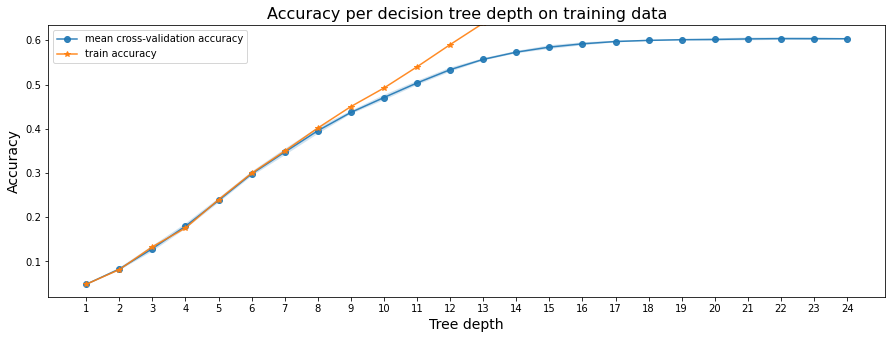

In [20]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [21]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-22 tree achieves the best mean cross-validation accuracy 60.37613 +/- 0.13787% on training dataset


**Note**: Because of the significant computing process, I am not going to work with trees that have 22 levels. Even running cross validation with 5 levels takes my computer 10-15 minutes. So even though within the range of 25 levels, 22 seems to be the better option, I will stick to 3 levels for ease of computing for the remaining notebook.

## Other Paramerers

**Note:** I do not know how to select the best values for the other parameters, so I will investigate some random values and choose the best one amongst them. I will use a Grid Search for it, next few cells are taken from https://www.kaggle.com/gauravduttakiit/hyperparameter-tuning-in-decision-trees tutorial.

In [23]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(yTrain, dt_classifier.predict(xTrain)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(yTrain, dt_classifier.predict(xTrain)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(yTest, dt_classifier.predict(xTest)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(yTest, dt_classifier.predict(xTest)))

In [41]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    plot_tree(dt_classifier, fontsize=13)

In [21]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {
    "max_depth": [2],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [5, 10, 20, 50, 10]
}

In [30]:
grid_search = GridSearchCV(estimator=tree_clf, param_grid=params, cv=4,
                           n_jobs=-1, verbose=1, scoring = "accuracy")

In [31]:
%%time
grid_search.fit(xTrain, yTrain)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 17.1 s, sys: 1.1 s, total: 18.2 s
Wall time: 23min 50s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 10]},
             scoring='accuracy', verbose=1)

In [34]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,34.095582,0.108167,0.358031,0.015192,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
1,30.082133,0.292769,0.301320,0.047842,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
2,29.231957,0.108059,0.257804,0.003832,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
3,27.179269,0.226733,0.283059,0.015605,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
4,26.474251,0.542256,0.276274,0.018390,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1


In [43]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,34.095582,0.108167,0.358031,0.015192,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
1,30.082133,0.292769,0.301320,0.047842,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
2,29.231957,0.108059,0.257804,0.003832,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
3,27.179269,0.226733,0.283059,0.015605,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1
4,26.474251,0.542256,0.276274,0.018390,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.081664,0.084953,0.081372,0.081648,0.082409,0.001473,1


In [35]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [36]:
dt_best = grid_search.best_estimator_

In [37]:
# First matrix is for training data, second matrix is for test data
evaluate_model(dt_best)

Train Accuracy : 0.08169905106190692
Train Confusion Matrix:
[[   0 2194 2641 ...    0    0    0]
 [   0 4619  265 ...    0    0    0]
 [   0    5 5994 ...    0    0    0]
 ...
 [   0  283 4708 ...    0    0    0]
 [   0  454 3276 ...    0    0    0]
 [   0   20 3191 ...    0    0    0]]
--------------------------------------------------
Test Accuracy : 0.06994059200456586
Test Confusion Matrix:
[[   0  279  481 ...    0    0    0]
 [   0  698   75 ...    0    0    0]
 [   0    0 1000 ...    0    0    0]
 ...
 [   0   45  768 ...    0    0    0]
 [   0   68  534 ...    0    0    0]
 [   0    2  514 ...    0    0    0]]


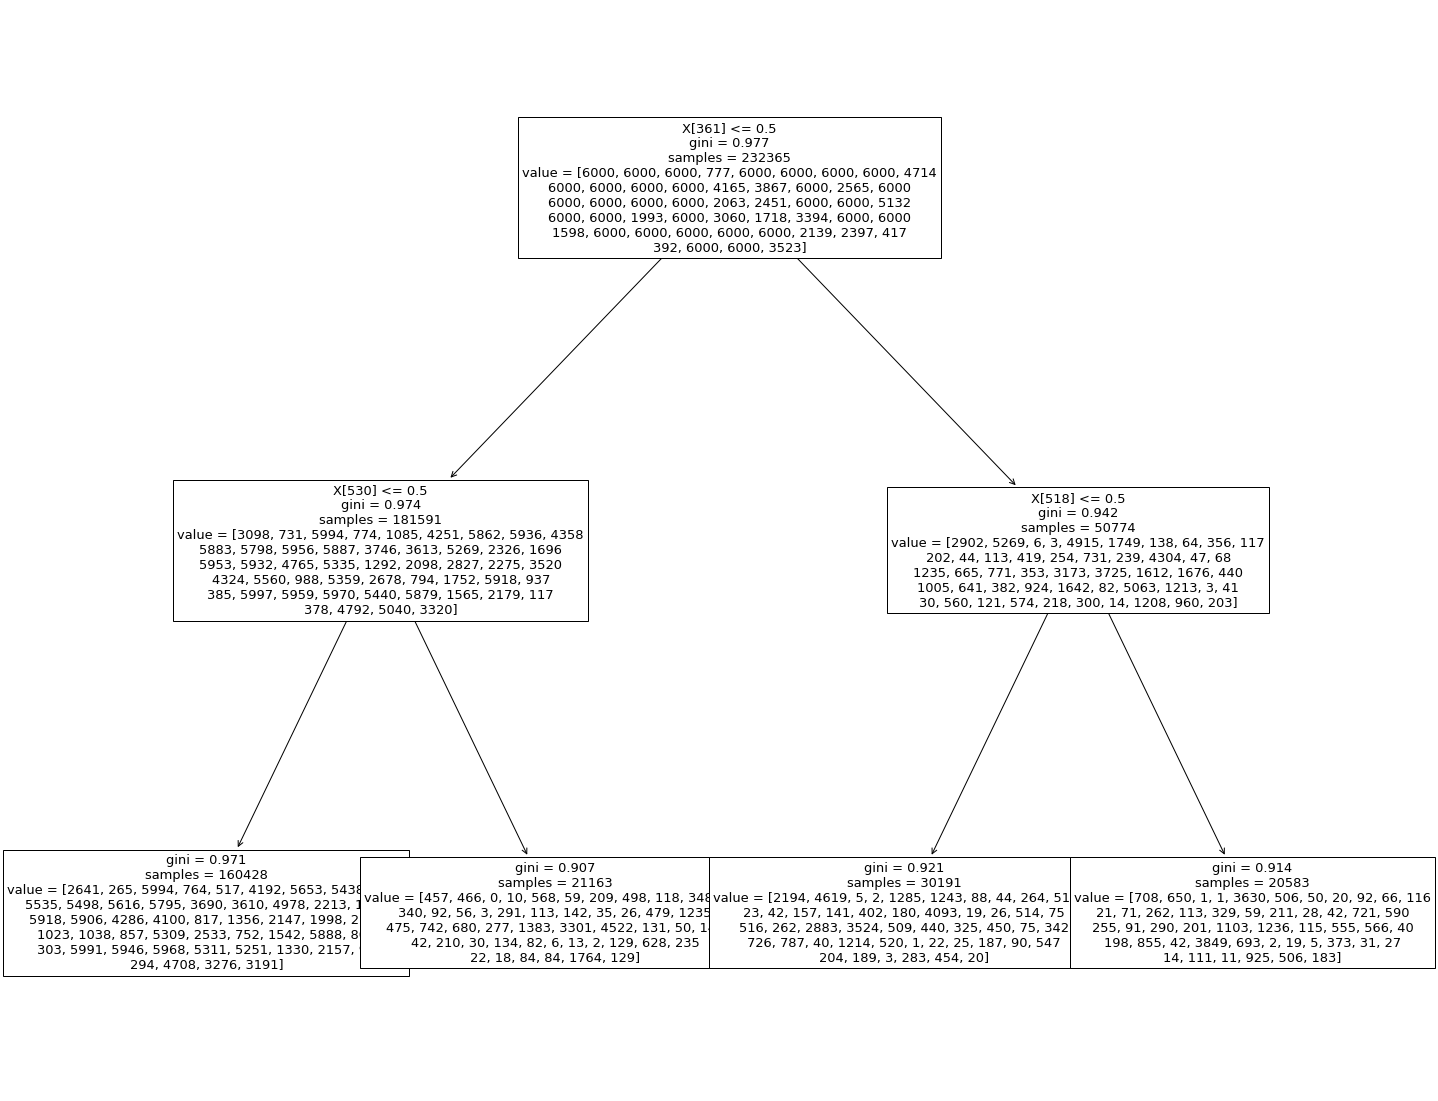

In [42]:
get_dt_graph(dt_best)

### Observations
1. As seen from the higher mean test score in 43, gini appears to be the better measure of split quality here compared to entropy.
2. Out of the random values I used for grid search, the best ones appear to be max depth of 2 (didn't give any other options due to computation costs, minimum sample leaf of 5 and minimum sample split of 5 as well.
3. Using these newly choosen parameters, the accuracy for training data **decreased** by 0.01 to **8.16%.**
4. Using these newly choosen parameters, the accuracy for the test data  remains the **same** at **6.99%** (2.s.d).
5. Given the minor changes, it is unsurprising that this new tree graph displayed above is the same as the old one (i.e. features and gini values; didnt compare values).

### CW Spec: Making New Training and Test Datasets

#### Task 1: Move 30% of training data to testing data and note accuracy

In [104]:
sizeX30 = int( 0.30 * xTrain.shape[0] )
xTrain30 = xTrain[0:sizeX30]
newXTrain = xTrain[sizeX30:]
newXTest = np.append(xTest, xTrain30, axis=0)

sizeY30 = int( 0.30 * yTrain.shape[0])
yTrain30 = yTrain[0:sizeY30]
newYTrain = yTrain[sizeY30:]
newYTest = np.append(yTest, yTrain30, axis=0)

**Note:** For comparison purposes, I am using the original tree parameters from the tutorial, i.e. the ones I ran at the begining of the notebook before the tuning using gridsearch. It hardly made a difference anyway.

In [105]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(newXTrain, newYTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [107]:
yPred = tree_clf.predict(newXTrain)
accuracy = accuracy_score(newYTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 8.51%


In [108]:
yPred = tree_clf.predict(newXTest)

In [109]:
accuracy = accuracy_score(newYTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 8.06%


### Observation
1. Accuracy improved by **1.18** to **8.51%** for the training data.
2. Accuracy improved by **1.07** to **8.06%.** for the testing data.

#### Task 2: Move 60% of training data to testing data and note accuracy

In [110]:
sizeX60 = int( 0.60 * xTrain.shape[0] )
xTrain60 = xTrain[0:sizeX60]
newXTrain = xTrain[sizeX60:]
newXTest = np.append(xTest, xTrain60, axis=0)

sizeY60 = int( 0.60 * yTrain.shape[0])
yTrain60 = yTrain[0:sizeY60]
newYTrain = yTrain[sizeY60:]
newYTest = np.append(yTest, yTrain60, axis=0)

In [111]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(newXTrain, newYTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [112]:
yPred = tree_clf.predict(newXTrain)
accuracy = accuracy_score(newYTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 8.54%


In [102]:
yPred = tree_clf.predict(newXTest)

In [103]:
accuracy = accuracy_score(newYTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 8.22%


### Observation
1. Accuracy improved by **0.37** to **8.54%** for the training data.
2. Accuracy improved by **1.23** to **8.22%.** for the testing data.

## Answer to CW Spec Question

Although the changes are not significantly big compared to the proportion of training data moved to test data, we had accuracy improvements in both tasks as well as both training and testing accuracies. <br><br>
**In both tasks, size of training data goes down and size of test data increases, and accuracy for training data is higher in both tasks compared to testing data. Although not very strong, since the baseline perfomance of this model is not very good to begin with (<10% accuracy), we can certainly see some overfitting as all those decision trees we experimented with do not deal well with unseen data.**